In [74]:
# Jack's car rental problem
# Policy Iteration is preferable for large action space while Value Iteration is preferable for smaller action space. 
# However, value iteration implementation is simpler than policy iteration improvement.
# Credit to Nguyen Dang Quang, PhD Student, Kyung Hee University, Suwon, Korea.

import numpy as np
from math import *

MAX_CARS = 20
MAX_MOVE_OF_CARS = 5

CAR_REQUEST_LOC_1 = 3
CAR_REQUEST_LOC_2 = 4

CAR_RETURN_LOC_1 = 3
CAR_RETURN_LOC_2 = 2

#To make it simple, First I assume that the demand/return everyday is a fixed number instead of following the Poisson Distribution.

DISCOUNT_RATE = 0.9

DAILY_RATE = 10
MOVE_COST = 2

# Location 1 has i cars and location 2 has j car. The state is then [i,j]
state = []
for i in range(MAX_CARS + 1):
  for j in range(MAX_CARS + 1):
    state.append([i,j])
print('State')
print(state)

# After perform action a, state [i,j] will change to state[i+a, j-a]
action = range(-MAX_MOVE_OF_CARS, MAX_MOVE_OF_CARS + 1)
print('Action')
print(action)

print('Value')
value = np.zeros([MAX_CARS + 1, MAX_CARS + 1])
print(value)

print('Policy')
policy = np.zeros([MAX_CARS + 1, MAX_CARS + 1])
print(policy)

State
[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10], [0, 11], [0, 12], [0, 13], [0, 14], [0, 15], [0, 16], [0, 17], [0, 18], [0, 19], [0, 20], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [1, 10], [1, 11], [1, 12], [1, 13], [1, 14], [1, 15], [1, 16], [1, 17], [1, 18], [1, 19], [1, 20], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [2, 10], [2, 11], [2, 12], [2, 13], [2, 14], [2, 15], [2, 16], [2, 17], [2, 18], [2, 19], [2, 20], [3, 0], [3, 1], [3, 2], [3, 3], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [3, 9], [3, 10], [3, 11], [3, 12], [3, 13], [3, 14], [3, 15], [3, 16], [3, 17], [3, 18], [3, 19], [3, 20], [4, 0], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5], [4, 6], [4, 7], [4, 8], [4, 9], [4, 10], [4, 11], [4, 12], [4, 13], [4, 14], [4, 15], [4, 16], [4, 17], [4, 18], [4, 19], [4, 20], [5, 0], [5, 1], [5, 2], [5, 3], [5, 4], [5, 5], [5, 6], [5, 7], [5, 8], [5, 9], [5, 10], [5, 11], 

In [58]:
def nextState(currentState, action):
  nextState_0 = currentState[0] + action
  nextState_1 = currentState[1] - action
  if ((nextState_0 in range(MAX_CARS + 1)) and (nextState_1 in range(MAX_CARS + 1))):
    return [nextState_0, nextState_1]
  else:
    return None
  
state123 = [10, 13]
print(nextState(state123, -5))
print(nextState(state123, -20))

[5, 18]
None


In [80]:
# Policy Evaluation
def policyEval(value, policy, gamma, theta = 0.1):
  V = np.copy(value)
  convergence = False
  while (not convergence):
    delta = 0
    new_V = np.copy(V)
    for s in state:
      real_request_loc_1 = min(CAR_REQUEST_LOC_1, s[0])
      real_request_loc_2 = min(CAR_REQUEST_LOC_2, s[1])
      a = policy[min(s[0]-real_request_loc_1, MAX_CARS), min(s[1]-real_request_loc_2, MAX_CARS)]
      reward = (real_request_loc_1 + real_request_loc_2) * DAILY_RATE - MOVE_COST * np.abs(a)
      i = s[0]
      j = s[1]
      i_ = int(s[0] - real_request_loc_1 + a + CAR_RETURN_LOC_1)
      j_ = int(s[1] - real_request_loc_2 - a + CAR_RETURN_LOC_2)
      if (i_ in range(MAX_CARS + 1)) and (j_ in range(MAX_CARS + 1)):
#         print('i = {}, j = {}, i_ = {}, j_ = {}'.format(i,j,i_,j_))
        new_V[i,j] = reward + gamma * V[i_, j_]
        delta = max(delta, np.abs(new_V[i,j] - V[i,j]))
    print('delta %f' % delta)
    V = np.copy(new_V)
    if delta < theta:
      convergence = True
  return(V)

evaluated_value = policyEval(value, policy, 0.9, 0.001)

print("\nMAX EVALUATED VALUE: ")
print(np.max(evaluated_value))

delta 70.000000
delta 63.000000
delta 56.700000
delta 51.030000
delta 45.927000
delta 41.334300
delta 37.200870
delta 33.480783
delta 30.132705
delta 19.371024
delta 17.433922
delta 15.690530
delta 14.121477
delta 12.709329
delta 11.438396
delta 10.294557
delta 9.265101
delta 8.338591
delta 7.504732
delta 6.754259
delta 6.078833
delta 5.470949
delta 4.923855
delta 4.431469
delta 3.988322
delta 3.589490
delta 3.230541
delta 2.907487
delta 2.616738
delta 2.355064
delta 2.119558
delta 1.907602
delta 1.716842
delta 1.545158
delta 1.390642
delta 1.251578
delta 1.126420
delta 1.013778
delta 0.912400
delta 0.821160
delta 0.739044
delta 0.665140
delta 0.598626
delta 0.538763
delta 0.484887
delta 0.436398
delta 0.392758
delta 0.353483
delta 0.318134
delta 0.286321
delta 0.257689
delta 0.231920
delta 0.208728
delta 0.187855
delta 0.169070
delta 0.152163
delta 0.136946
delta 0.123252
delta 0.110927
delta 0.099834
delta 0.089851
delta 0.080865
delta 0.072779
delta 0.065501
delta 0.058951
delta 0.0

In [81]:
def findMax(V, current_state, gamma, actions):
  max_value = -999999
  max_a = 0
  for a in actions:
    real_request_loc_1 = min(CAR_REQUEST_LOC_1, current_state[0])
    real_request_loc_2 = min(CAR_REQUEST_LOC_2, current_state[1])
    if ((current_state[0] - real_request_loc_1 + a + CAR_RETURN_LOC_1) in range(MAX_CARS+1)) and ((current_state[1] - real_request_loc_2 - a + CAR_RETURN_LOC_2) in range(MAX_CARS+1)):
      reward = (real_request_loc_1 + real_request_loc_2) * DAILY_RATE - MOVE_COST * np.abs(a)
      i = current_state[0]
      j = current_state[1]
      i_ = current_state[0]-real_request_loc_1 + a + CAR_RETURN_LOC_1
      j_ = current_state[1]-real_request_loc_2 - a + CAR_RETURN_LOC_2
      temp_value = reward + gamma * V[i_, j_]
      if temp_value > max_value:
        # print("TEMP VALUE = {} VS MAX = {} ".format(temp_value, max_value))
        max_value = temp_value
        max_a = a
  return max_value, max_a


max_value, max_action = findMax(value, [10, 0], 0.9, action)
print("Test Max_value = ", max_value)
print("Test Max_action = ", max_action)

Test Max_value =  30.0
Test Max_action =  0


In [92]:
# Policy Iteration
optimal_policy = np.copy(policy)
value1 = np.copy(value)

while (True):
  policy_stable = True
  value1 = policyEval(value1, optimal_policy, 0.9, theta=0.0001)
  for s in state:
    new_value, new_action = findMax(value1, s, 0.9, action)
    if (new_value > value1[s[0], s[1]]) and (optimal_policy[s[0], s[1]] != new_action):
      optimal_policy[s[0], s[1]] = new_action
      policy_stable = False
  if policy_stable:
    break

print(optimal_policy)

delta 70.000000
delta 63.000000
delta 56.700000
delta 51.030000
delta 45.927000
delta 41.334300
delta 37.200870
delta 33.480783
delta 30.132705
delta 19.371024
delta 17.433922
delta 15.690530
delta 14.121477
delta 12.709329
delta 11.438396
delta 10.294557
delta 9.265101
delta 8.338591
delta 7.504732
delta 6.754259
delta 6.078833
delta 5.470949
delta 4.923855
delta 4.431469
delta 3.988322
delta 3.589490
delta 3.230541
delta 2.907487
delta 2.616738
delta 2.355064
delta 2.119558
delta 1.907602
delta 1.716842
delta 1.545158
delta 1.390642
delta 1.251578
delta 1.126420
delta 1.013778
delta 0.912400
delta 0.821160
delta 0.739044
delta 0.665140
delta 0.598626
delta 0.538763
delta 0.484887
delta 0.436398
delta 0.392758
delta 0.353483
delta 0.318134
delta 0.286321
delta 0.257689
delta 0.231920
delta 0.208728
delta 0.187855
delta 0.169070
delta 0.152163
delta 0.136946
delta 0.123252
delta 0.110927
delta 0.099834
delta 0.089851
delta 0.080865
delta 0.072779
delta 0.065501
delta 0.058951
delta 0.0

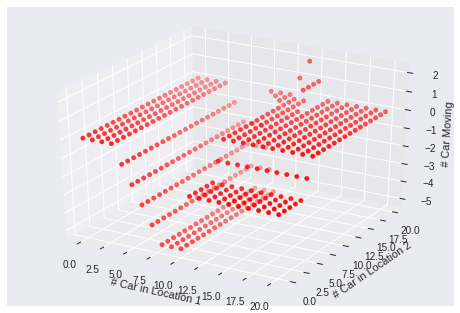

In [93]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = []
y = []
z = []
for s in state:
  x.append(s[0])
  y.append(s[1])
  z.append(optimal_policy[s[0], s[1]])

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('# Car in Location 1')
ax.set_ylabel('# Car in Location 2')
ax.set_zlabel('# Car Moving')

plt.show()

0.0
-2.0


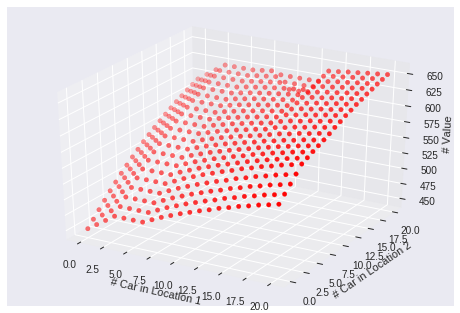

In [94]:
print(optimal_policy[0,20])
print(optimal_policy[20, 0])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = []
y = []
z = []
for s in state:
  x.append(s[0])
  y.append(s[1])
  z.append(value1[s[0], s[1]])

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('# Car in Location 1')
ax.set_ylabel('# Car in Location 2')
ax.set_zlabel('# Value')

plt.show()